In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## CATALOG

In [8]:
cat = pd.read_csv("/Users/korayaydogan/Downloads/cat_dark.csv")
cat = cat.drop([213913-200001, 226305-200001, 233597-200001, 244071-200001, 259871-200001, 261145-200001, 270458-200001, 288731-200001,
       294173-200001])

test_cat = cat[:79991]

plotting


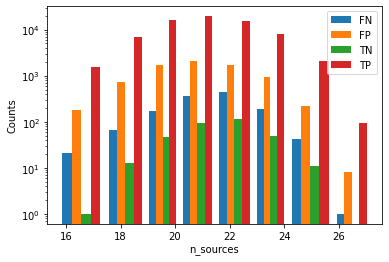

In [9]:
pred = np.load("/Users/korayaydogan/Downloads/pred_rotation.npy")
test = pd.read_csv("/Users/korayaydogan/Downloads/test.csv")["0"]
test = np.array(test)

def plotter(param=None):
    #param (str): column name in the catalog
    cat_data = np.array(test_cat[param]) # the x axis
    
    lst = []
    for i in range(pred[:,1].shape[0]):
        if np.round(pred[:,1][i]) == 1 and test[i] == 0:
            lst.append("FP")
        if np.round(pred[:,1][i]) == 0 and test[i] == 1:
            lst.append("FN")
        if np.round(pred[:,1][i]) == 0 and test[i] == 0:
            lst.append("TN")
        if np.round(pred[:,1][i]) == 1 and test[i] == 1:
            lst.append("TP") 
            
    fn_index = list(np.where(np.array(lst)=="FN")[0])
    fp_index = list(np.where(np.array(lst)=="FP")[0])
    tn_index = list(np.where(np.array(lst)=="TN")[0])
    tp_index = list(np.where(np.array(lst)=="TP")[0]) #the y axis
    
    fn_data = []
    fp_data = []
    tn_data = []
    tp_data = []
    
    for i in fn_index:
        fn_data.append(cat_data[i])
        
    for i in fp_index:
        fp_data.append(cat_data[i])
        
    for i in tn_index:
        tn_data.append(cat_data[i])
        
    for i in tp_index:
        tp_data.append(cat_data[i])       

    cat_data = np.sort(cat_data)
    fn_data, fp_data, tn_data, tp_data = np.array(fn_data), np.array(fp_data), np.array(tn_data), np.array(tp_data)
    
    print("plotting")
    bin_min = min(cat_data)
    bin_max = max(cat_data)
    bins = np.linspace(bin_min, bin_max, 10)
    
    digitized = np.digitize(cat_data, bins)
    bin_means = [cat_data[digitized == i].mean() for i in range(1, len(bins))]
    
    plt.hist([fn_data, fp_data, tn_data, tp_data], bin_means, label=["FN", "FP", "TN", "TP"], log=True)
    plt.xlabel("n_sources")
    plt.ylabel("Counts")
    plt.legend()
    plt.savefig("/Users/korayaydogan/Desktop/Grav_Lens/Supervised/Plots/Rotation/n_sources.png")
    plt.show()
         

plotter("n_sources")

In [16]:
cat.columns

Index(['ID', 'x_crit', 'y_crit', 'source_ID', 'z_source', 'z_lens',
       'mag_source', 'ein_area', 'n_crit', 'r_source', 'crit_area',
       'n_pix_source', 'source_flux', 'n_pix_lens', 'lens_flux', 'n_source_im',
       'mag_eff', 'sb_contrast', 'color_diff', 'n_gal_3', 'n_gal_5',
       'n_gal_10', 'halo_mass', 'star_mass', 'mag_lens', 'n_sources',
       'Unnamed: 26'],
      dtype='object')

## NEW PRA + ERROR BARS

In [53]:
cat_data = np.array(test_cat["halo_mass"])

In [54]:
pred = np.load("/Users/korayaydogan/Downloads/pred_rotation.npy")
test = pd.read_csv("/Users/korayaydogan/Downloads/test.csv")["0"]
test = np.array(test)

def plotter(param=None):
    #param (str): column name in the catalog
    cat_data = np.array(test_cat[param]) # the x axis
    
    lst = []
    for i in range(pred[:,1].shape[0]):
        if np.round(pred[:,1][i]) == 1 and test[i] == 0:
            lst.append("FP")
        if np.round(pred[:,1][i]) == 0 and test[i] == 1:
            lst.append("FN")
        if np.round(pred[:,1][i]) == 0 and test[i] == 0:
            lst.append("TN")
        if np.round(pred[:,1][i]) == 1 and test[i] == 1:
            lst.append("TP") 
            
    fn_index = list(np.where(np.array(lst)=="FN")[0])
    fp_index = list(np.where(np.array(lst)=="FP")[0])
    tn_index = list(np.where(np.array(lst)=="TN")[0])
    tp_index = list(np.where(np.array(lst)=="TP")[0]) #the y axis
    
    fn_data = []
    fp_data = []
    tn_data = []
    tp_data = []
    
    for i in fn_index:
        fn_data.append(cat_data[i])
        
    for i in fp_index:
        fp_data.append(cat_data[i])
        
    for i in tn_index:
        tn_data.append(cat_data[i])
        
    for i in tp_index:
        tp_data.append(cat_data[i])       

    cat_data = np.sort(cat_data)
    fn_data, fp_data, tn_data, tp_data = np.array(fn_data), np.array(fp_data), np.array(tn_data), np.array(tp_data)
    
    bin_min = min(cat_data)
    bin_max = max(cat_data)
    bins = np.linspace(bin_min, bin_max, 12)
    
    digitized = np.digitize(cat_data, bins)
    bin_means = [cat_data[digitized == i].mean() for i in range(1, len(bins))]

    counts, bins, patches = plt.hist([fn_data, fp_data, tn_data, tp_data], bin_means, label=["fn", "fp", "tn", "tp"], log=True)
    
    fn_count = counts[0]
    fp_count = counts[1]
    tn_count = counts[2]
    tp_count = counts[3]
    
    pres = tp_count / (tp_count + fp_count)
    rec = tp_count / (tp_count + fn_count)
    acc = (tp_count + tn_count) / (tp_count + tn_count + fp_count + fn_count)

    pres[np.isnan(pres)] = 0
    rec[np.isnan(rec)] = 0
    acc[np.isnan(acc)] = 0
    print(pres.shape)
    return pres, rec, acc

(10,)
(10,)


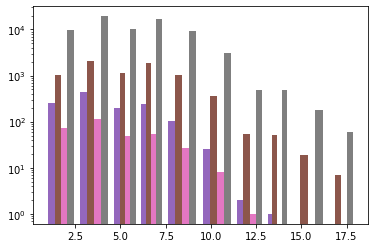

In [55]:
pres = plotter("halo_mass")[0]
rec = plotter("halo_mass")[1]

In [56]:
bin_min = min(cat_data)
bin_max = max(cat_data)
bins = np.linspace(bin_min, bin_max, 11)

digitized = np.digitize(cat_data, bins)
bin_means = [cat_data[digitized == i].mean() for i in range(1, len(bins))] 
len(bin_means)
bin_means = np.nan_to_num(bin_means)

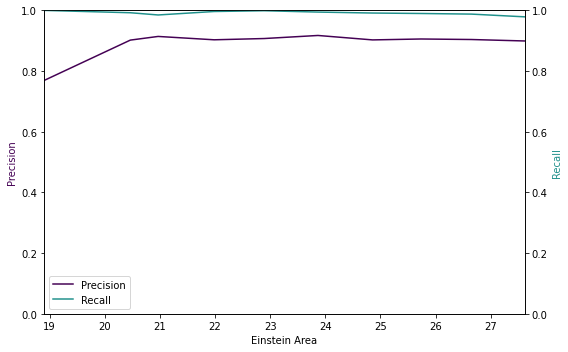

In [39]:
fig, host = plt.subplots(figsize=(8,5))  
par1 = host.twinx()

host.set_xlim(min(bin_means), max(bin_means))
host.set_ylim(0, 1)
par1.set_ylim(0, 1)
    
host.set_xlabel("Einstein Area")
host.set_ylabel("Precision")
par1.set_ylabel("Recall")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)

p1, = host.plot(bin_means, pres, color=color1, label="Precision")
p2, = par1.plot(bin_means, rec, color=color2, label="Recall")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

par2.spines['right'].set_position(('outward', 60))

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

fig.tight_layout()
#plt.savefig("/Users/korayaydogan/Desktop/Grav_Lens/Supervised/Plots/Rotation/pra_z_lens_rotation_aug.png")
plt.show()

In [22]:
pres_mean = np.mean(pres)
rec_mean = np.mean(rec)


# Calculate the standard deviation
pres_std = np.std(pres)
rec_std = np.std(rec)


# Define labels, positions, bar heights and error bar heights
labels = ['Precision', 'Recall']
x_pos = np.arange(len(labels))
CTEs = [pres_mean, rec_mean]
error = [pres_std, rec_std]

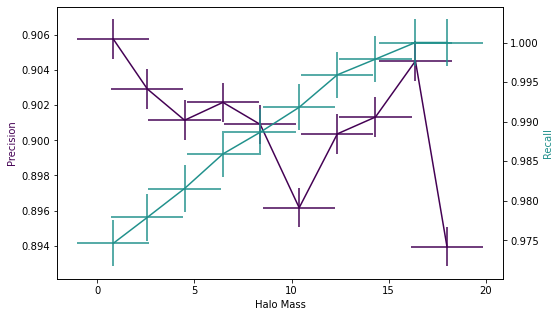

In [58]:
fig, host = plt.subplots(figsize=(8,5)) # (width, height) in inches

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
    
    
par1 = host.twinx()

host.set_xlabel("Halo Mass")
host.set_ylabel("Precision")
par1.set_ylabel("Recall")

host.yaxis.label.set_color(color1)
par1.yaxis.label.set_color(color2)

host.errorbar(bin_means, pres, xerr=sem(bin_means), yerr=sem(pres), color=color1)
par1.errorbar(bin_means, rec, xerr=sem(bin_means), yerr=sem(rec), color=color2)

#plt.savefig("/Users/korayaydogan/Desktop/Grav_Lens/Supervised/Plots/Rotation/pra_halo_mass_rotation_aug.png")
plt.savefig("/Users/korayaydogan/Downloads/pra_halo_mass_rotation_aug.png")